# 实验二：回归模型

# 机器学习作业二
- 姓名：艾明旭
- 学号：2111033
- 专业：信息安全

- 回归是监督学习的一个重要问题，回归用于预测**输入变量**和**输出变量**之间的关系，特别是当输入变量的值发生变化时，输出变量的值也随之发生变化。
- 回归模型是一种表示从输入变量到输出变量之间映射的函数
- 对连续值的预测
- 可以用合适的曲线揭示样本点随着自变量的变化关系

## 实验要求
### 截止日期：10月22日
作业的提交格式参考之前的说明，提交到18329300691@163.com
### 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
1. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。


### 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

### 导入需要的包

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv
import operator
import random



### 导入数据集 semesion

In [4]:
# 导入数据
# data数据尚未进行预处理
data = pd.read_csv("D:\dasanshang\jiqixuexi\P2\winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### 对数据集进行预处理

对数据集的预处理是一个十分重要的步骤，能够使不同量纲的特征处于同一数值量级，减少方差大的特征的影响，使模型更准确，并加快学习算法的收敛速度。

常用的预处理方法有：标准化、归一化和中心化。同学们根据需要从中选择一种或几种方法进行预处理（采用其他方法亦可）。

![image.png](https://s2.loli.net/2022/10/04/WqxB76cXLGtePSK.png)

In [5]:
# 数据预处理
# 中心化代码
def Normalization_fun(x):
    # 特征零均值
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

# 提取特征和标签
X = data.iloc[:, 0:-1]  # N D
X = Normalization_fun(X)
Y = data.iloc[:, -1]

# 测试X，Y
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.013963         -0.008080     0.015547        0.219457  -0.002292   
1         -0.053345          0.021332     0.003499       -0.073488   0.009578   
2          0.119732          0.001724     0.039644        0.007800   0.012545   
3          0.033193         -0.047295    -0.008549        0.032340   0.036284   
4          0.033193         -0.047295    -0.008549        0.032340   0.036284   
...             ...               ...          ...             ...        ...   
4893      -0.062960         -0.066903    -0.026621       -0.073488  -0.020096   
4894      -0.024499          0.040940     0.015547        0.024672   0.003643   
4895      -0.034114         -0.037491    -0.086862       -0.079623  -0.014161   
4896      -0.130268          0.011528    -0.020597       -0.081157  -0.070541   
4897      -0.082191         -0.066903     0.027595       -0.085758  -0.076476   

      free sulfur dioxide  

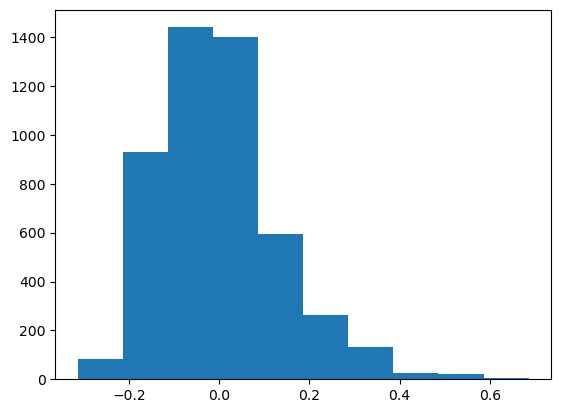

In [6]:
# 可视化中心化后的sulphates特征
import matplotlib.pyplot as plt
plt.hist(X["sulphates"])
plt.show()

In [7]:
# 这里注意一个小trick：回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X左侧添加全为1的一列
# data0为处理好的所有列
data0 = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['x0']), X], axis=1)
data0

,x0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.013963,-0.008080,0.015547,0.219457,-0.002292,0.033770,0.073409,0.134425,-0.171151,-0.046334,-0.276495
1,1.0,-0.053345,0.021332,0.003499,-0.073488,0.009578,-0.074244,-0.014758,-0.000528,0.101576,0.000178,-0.163591
2,1.0,0.119732,0.001724,0.039644,0.007800,0.012545,-0.018495,-0.095964,0.020679,0.065212,-0.057961,-0.066817
3,1.0,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
4,1.0,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,1.0,-0.062960,-0.066903,-0.026621,-0.073488,-0.020096,-0.039401,-0.107565,-0.055666,0.074303,0.011806,0.110602
4894,1.0,-0.024499,0.040940,0.015547,0.024672,0.003643,0.075582,0.068769,0.016823,-0.034788,-0.034706,-0.147462
4895,1.0,-0.034114,-0.037491,-0.086862,-0.079623,-0.014161,-0.018495,-0.063482,-0.028675,-0.180242,-0.034706,-0.179720
4896,1.0,-0.130268,0.011528,-0.020597,-0.081157,-0.070541,-0.053338,-0.065802,-0.102899,0.137939,-0.127729,0.368667


In [ ]:
print(Y)

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [9]:
# 初始化回归系数
W_init = np.random.randn(data0.shape[1], 1)
W_init

array([[-0.08543823],
       [-0.43622065],
       [-0.12327439],
       [-1.23013887],
       [-0.86821258],
       [ 1.26888611],
       [ 0.52992479],
       [-0.39588687],
       [ 0.77449572],
       [-0.91705085],
       [ 1.32479824],
       [ 0.18579127]])

In [10]:
# 初始化回归系数
W_init = np.random.randn(data0.shape[1], 1)
W_init

array([[-0.25234852],
       [ 1.55396268],
       [ 0.21944025],
       [ 0.49209567],
       [-1.01790253],
       [ 1.26405492],
       [-0.70120611],
       [ 1.1282799 ],
       [-1.2512353 ],
       [ 0.13211097],
       [ 1.555655  ],
       [-0.67651714]])

## TODO：批量梯度下降
## TODO：随机梯度下降
## TODO：回归模型在机器学习和统计学上的差异
## TODO：岭回归

In [12]:
# 4:1划分训练集和测试集
# x_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.2) #划分训练集
gbr = data.groupby('quality')  # 用分组函数groupby()进行数据的分组，分组依据为'TYPE'这一属性
gbr.groups    # 获取分组后gbr的数据

{3: [251, 253, 294, 445, 740, 873, 1034, 1229, 1417, 1484, 1688, 1931, 2050, 2373, 3087, 3265, 3307, 3409, 3810, 4745], 4: [46, 98, 115, 147, 172, 176, 178, 189, 204, 207, 230, 250, 259, 278, 282, 433, 496, 499, 526, 540, 626, 641, 646, 659, 662, 687, 690, 702, 780, 831, 905, 906, 908, 914, 948, 991, 993, 1027, 1029, 1040, 1042, 1053, 1059, 1109, 1114, 1152, 1154, 1155, 1245, 1293, 1294, 1349, 1363, 1405, 1420, 1423, 1430, 1474, 1483, 1541, 1558, 1559, 1574, 1577, 1579, 1649, 1652, 1664, 1690, 1702, 1708, 1718, 1739, 1781, 1817, 1856, 1924, 1951, 1990, 2079, 2116, 2119, 2154, 2156, 2159, 2225, 2237, 2246, 2275, 2318, 2337, 2346, 2372, 2379, 2380, 2386, 2387, 2388, 2400, 2401, ...], 5: [10, 11, 12, 14, 19, 23, 34, 35, 36, 38, 39, 47, 49, 62, 65, 67, 69, 71, 72, 75, 78, 79, 82, 84, 88, 91, 100, 101, 102, 103, 104, 106, 109, 111, 112, 113, 114, 118, 119, 120, 121, 122, 126, 130, 132, 133, 134, 135, 137, 140, 141, 153, 161, 162, 164, 165, 168, 169, 174, 177, 181, 182, 184, 185, 187, 191, 1

训练集和测试集的划分需要参照数据的有效率，这里我们检查过后决定使用0.2的测试集

##### 划分各组长度，并将其存入数组

In [13]:

print(len(gbr.groups[3]))
print(len(gbr.groups))
print('-----------------------------------------------------')
for i in range(3, 10):
    print(i)
print('-----------------------------------------------------')
    
x = 0
every_len = []

for i in range(3, 10):
    x += len(gbr.groups[i])
    every_len.append(len(gbr.groups[i]))
    print(len(gbr.groups[i]))
    
print('-----------------------------------------------------')
    
print(x)
print(every_len)

20
7
-----------------------------------------------------
3
4
5
6
7
8
9
-----------------------------------------------------
20
163
1457
2198
880
175
5
-----------------------------------------------------
4898
[20, 163, 1457, 2198, 880, 175, 5]


所有数据中80%作为训练数据集，20%作为测试数据集，因此选定train_rate为0.8

In [14]:
train_rate = 0.8     
n_tup = np.array(every_len)   # 全部数据中7种酒的质量的元组数
n_train_tup = np.array([(int)(round(i*train_rate)) for i in n_tup])   # round函数对数进行四舍五入处理
n_test_tup = n_tup - n_train_tup
print(n_train_tup)
print(n_test_tup)
#print(num_tup)

[  16  130 1166 1758  704  140    4]
[  4  33 291 440 176  35   1]


##### 定义分层抽样的字典，格式为：组名：数据个数

In [15]:

NDict_train = {3: num_train_tup[0], 4: num_train_tup[1], 5: num_train_tup[2], 6: num_train_tup[3],
                      7: num_train_tup[4], 8: num_train_tup[5], 9: num_train_tup[6]}  # 此处要根据不同的地物类型的总数设置抽样的数据
NDict_test = {3: num_test_tup[0], 4: num_test_tup[1], 5: num_test_tup[2], 6: num_test_tup[3],
                      7: num_test_tup[4], 8: num_test_tup[5], 9: num_test_tup[6]}  # 此处要根据不同的地物类型的总数设置抽样的数据
print(NDict_train)
print(NDict_test)

{3: 16, 4: 130, 5: 1166, 6: 1758, 7: 704, 8: 140, 9: 4}
{3: 4, 4: 33, 5: 291, 6: 440, 7: 176, 8: 35, 9: 1}


测试抽样的数据需要我们在此重新进行划分，以便生成新的随机测试序列。

In [16]:
# 测试随机生成数
resultL = random.sample(range(0,20), 16)
print(resultL)

[13, 10, 19, 4, 14, 2, 1, 8, 16, 11, 0, 18, 15, 9, 3, 5]


对于生成训练集和测试集的序号我们需要进行重新编号以及排序

In [ ]:
# 这里进行划分，如果在样本的gbr部分内，就认为我们是训练集内的数据，否则认为是测试集当中的数据。

In [17]:
# 开始生成训练集和测试集的前面序号的list
train_list = []
test_list = []

for i in range(3, 10):
    mid_list = random.sample(range(0, len(gbr.groups[i])), NDict_train[i])
    # mid_list = random.sample(range(0, len(gbr.groups[i]), NDict_train[i])
    
    for j in range(0, len(gbr.groups[i])):
        if j in mid_list:
            train_list.append(gbr.groups[i][j])
        else:
            test_list.append(gbr.groups[i][j])            
        
# print(train_list)
# print(test_list)
print('-----------------------------------------------------')
print(len(train_list))
print(len(test_list))
print('-----------------------------------------------------')
# train_list.sort()
# print(train_list)
# test_list.sort()
# print(test_list)

-----------------------------------------------------
3918
980
-----------------------------------------------------


对iloc当中的数据进行一定的确认，如果是相对正确的结果，那我们可以进行下一步的计算

In [18]:
# 测试iloc,发现逗号前面的数据即为所有的行，而后面的数据即为所有的列，nice!
test_z = X.iloc[[0,1],:]
print(test_z)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.013963         -0.008080     0.015547        0.219457  -0.002292   
1      -0.053345          0.021332     0.003499       -0.073488   0.009578   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.033770              0.073409  0.134425 -0.171151  -0.046334   
1            -0.074244             -0.014758 -0.000528  0.101576   0.000178   

    alcohol  
0 -0.276495  
1 -0.163591  


接下来我们按照相应的格式对于测试机和训练集进行测试样例模拟输出

In [19]:
# 开始分层抽样实现生成测试集80%和训练集20%，这里经过反复的验证最终选取这个值作为集合的划分。
x_train = data0.iloc[train_list, :]
x_test = data0.iloc[test_list, :]
print(x_train)
print('------------------------------------------------------------------------------------------------')
print(x_test)
print('------------------------------------------------------------------------------------------------')
y_train = Y.iloc[train_list]
y_test = Y.iloc[test_list]
print(y_train)
print('------------------------------------------------------------------------------------------------')
print(y_test)

       x0  fixed acidity  volatile acidity  citric acid  residual sugar  \
251   1.0       0.158193         -0.017883    -0.074814        0.150438   
294   1.0       0.215886          0.305646     0.027595       -0.073488   
445   1.0       0.023578          0.040940    -0.008549        0.070684   
740   1.0       0.004347          0.109568     0.039644       -0.027476   
873   1.0       0.331270         -0.106119     0.081812       -0.076555   
...   ...            ...               ...          ...             ...   
4802  1.0      -0.101422          0.001724     0.003499       -0.064286   
774   1.0       0.215886         -0.008080     0.069764        0.064549   
827   1.0       0.052424         -0.037491     0.015547       -0.067353   
876   1.0       0.004347          0.080156     0.003499       -0.033611   
1605  1.0       0.023578         -0.017883     0.093861       -0.064286   

      chlorides  free sulfur dioxide  total sulfur dioxide   density  \
251    0.083762            

接下来我们寻找训练集和测试集的长度，比较长度和原样本是否相同的同时我们可以验证测试集和训练集的划分是否是按照了相关的依据

In [20]:
print('x_train\'s length is:')
print(len(x_train))

print('x_test\'s length is:')
print(len(x_test))

print('y_train\'s length is:')
print(len(y_train))

print('y_test\'s length is:')
print(len(y_test))

x_train's length is:
3918
x_test's length is:
980
y_train's length is:
3918
y_test's length is:
980


接下来我们把测试集和训练集转化为np类型，方便我们进行后续操作的同时验证训练集和测试集当中的数据。

In [21]:
y_test = np.array(y_test)
print(y_test[0])
x_test = np.array(x_test)
print(x_test[0])
y_train = np.array(y_train)
print(y_train[0])
x_train = np.array(x_train)
print(x_train[0])

3
[ 1.         -0.10142189 -0.03749129  0.06374006 -0.04434685 -0.0497696
 -0.10560308 -0.06812217 -0.052581    0.31066669 -0.06958939  0.19124725]
3
[ 1.          0.15819349 -0.01788345 -0.07481416  0.15043842  0.08376155
  0.01983246  0.13605416  0.07658808 -0.15296967  0.01180596 -0.11520436]


#### 由于在之前已经归一化过，这里就不用再进行归一化的实现
仅仅需要我们之际计算相关函数的函数值，损失函数可以直接利用定义得到

In [22]:

def compute_cost(x_test, y_test, theta): #这个function是计算loss function的值， J(theta)公式
    m = y_test.size
    cost = 0
    t = theta.size
    for i in range(0,m):
        # x = x_test[i,1]
        # y = y_test[i]

        
        f = 0
        for j in range(t):
            f += theta[j] * x_test[i][j]

        cost += (y_test[i] - f) ** 2
    cost = cost / (2 * float(m))
    return cost
# 接下来的函数是计算并返回结果的函数
def gradient_descent(x_train, y_train, x_test, y_test, learning_rate, theta, num_iters):
    m = y_train.size
    train_history = np.zeros(num_iters)
    test_history = np.zeros(num_iters)
    t = theta.size
    # x_train = np.array(x_train)
    # x_test = np.array(x_test)
    for i in range(num_iters):
        # 初始化h_theta_x
        h_theta_x = []
        for k in range(m):
            mid = 0
            for j in range(t):
                mid += theta[j] * x_train[k][j]
            h_theta_x.append(mid)
        
        
        for j in range(t):   # BGD的特点就是每次迭代都使用所有的样本
            # 由于实在不想调这个现有的矩阵乘的格式，于是手写矩阵乘
            sum_result = 0
            for k in range(m):
                sum_result += (h_theta_x[k] - y_train[k]) * x_train[k][j]
            theta[j] = theta[j] - learning_rate * sum_result / m
        train_history[i] = compute_cost(x_train, y_train, theta)
        test_history[i] = compute_cost(x_test, y_test, theta)
    return theta, train_history, test_history

计算学习效率，我们可以通过绘制不同学习率下的测试结果，比较不同的图像，观察是否有一定的误差。

In [23]:
# 初始化回归系数
W_init = np.random.randn(data0.shape[1], 1)

iteration = 100 # 迭代的轮数
# print('start test which learning rate is 0.5')
# theta0, loss0_train, loss0_test = gradient_descent(x_train, y_train, x_train, y_train, 0.5, W_init, iteration)
# print(theta0)
# print(loss0_train)
# print(loss0_test)
# print('-------------------------------------------------------------------------------------')
print('start test which learning rate is 0.5')
theta1, loss1_train, loss1_test = gradient_descent(x_train, y_train, x_test, y_test, 0.5, W_init, iteration)
print(theta1)
print(loss1_train)
print(loss1_test)
print('-------------------------------------------------------------------------------------')
print('start test which learning rate is 0.3')
theta2, loss2_train, loss2_test = gradient_descent(x_train, y_train, x_test, y_test, 0.3, W_init, iteration)
print(theta2)
print(loss2_train)
print(loss2_test)
print('-------------------------------------------------------------------------------------')
print('start test which learning rate is 0.1')
theta3, loss3_train, loss3_test = gradient_descent(x_train, y_train, x_test, y_test, 0.1, W_init, iteration)
print(theta3)
print(loss3_train)
print(loss3_test)
print('-------------------------------------------------------------------------------------')
print('start test which learning rate is 0.01')
theta4, loss4_train, loss4_test = gradient_descent(x_train, y_train, x_test, y_test, 0.01, W_init, iteration)
print(theta4)
print(loss4_train)
print(loss4_test)
print('-------------------------------------------------------------------------------------')
print('start test which learning rate is 0.001')
theta5, loss5_train, loss5_test = gradient_descent(x_train, y_train, x_test, y_test, 0.001, W_init, iteration)
print(theta5)
print(loss5_train)
print(loss5_test)

start test which learning rate is 0.5
[[ 5.87723416]
 [-0.71154378]
 [-1.03091833]
 [-0.36306312]
 [-0.56533236]
 [-0.94902767]
 [-0.80347305]
 [ 0.26525619]
 [ 0.82418273]
 [ 0.22002324]
 [ 0.32927624]
 [ 1.45411962]]
[5.17798148 1.68453436 0.80452384 0.57815865 0.51548591 0.49400652
 0.48308375 0.47504667 0.46796625 0.4613494  0.45506256 0.4490625
 0.44332902 0.43784813 0.4326078  0.42759689 0.42280485 0.41822165
 0.41383772 0.40964393 0.40563159 0.40179241 0.39811846 0.3946022
 0.39123643 0.38801429 0.38492923 0.38197501 0.37914566 0.37643552
 0.37383916 0.37135141 0.36896735 0.36668227 0.36449169 0.36239133
 0.36037712 0.35844516 0.35659174 0.35481331 0.35310651 0.3514681
 0.34989503 0.34838434 0.34693325 0.34553909 0.34419932 0.3429115
 0.34167332 0.34048257 0.33933714 0.33823502 0.33717429 0.33615312
 0.33516976 0.33422255 0.33330989 0.33243027 0.33158224 0.33076441
 0.32997548 0.32921417 0.32847929 0.3277697  0.3270843  0.32642204
 0.32578193 0.32516302 0.3245644  0.32398521 0.3

接下来绘制不同学习率下的测试结果散点图

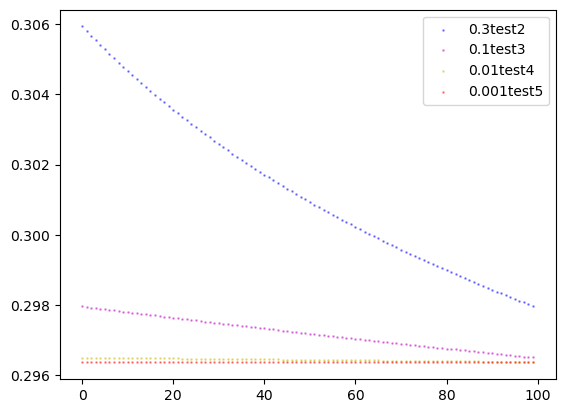

In [24]:
lssandiantu = []
for i in range(iteration):
    lssandiantu.append(i)
ter = np.array(ls)
# 画散点图
colors0 = '#000000'
# colors1 = '#00CED1' #点的颜色
# colors2 = '#DC143C'
# colors3 = '#66CDAA'
# colors4 = '#BEBEBE'
# colors5 = '#00FA9A'
colors1 = 'k'
colors2 = 'b'
colors3 = 'm'
colors4 = 'y'
colors5 = 'r' #自动设定颜色
area = np.pi * 0.5**2  # 点面积

plt.scatter(ter, loss2_test, s=area, c=colors2, alpha=0.4, label='0.3test2')
plt.scatter(ter, loss3_test, s=area, c=colors3, alpha=0.4, label='0.1test3')
plt.scatter(ter, loss4_test, s=area, c=colors4, alpha=0.4, label='0.01test4')
plt.scatter(ter, loss5_test, s=area, c=colors5, alpha=0.4, label='0.001test5')

plt.legend()
plt.show()

接下来绘制不同学习率下的测试结果曲线图

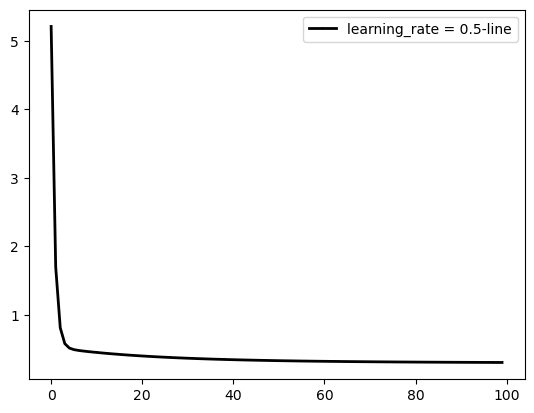

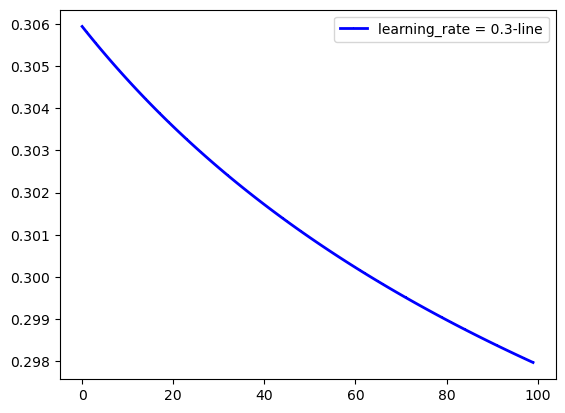

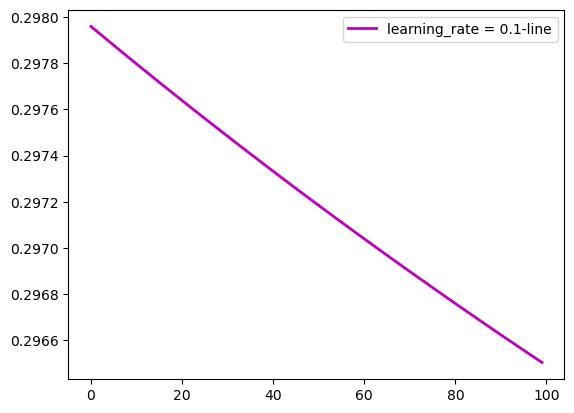

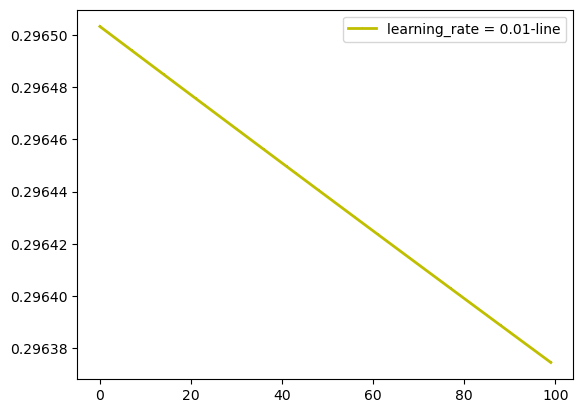

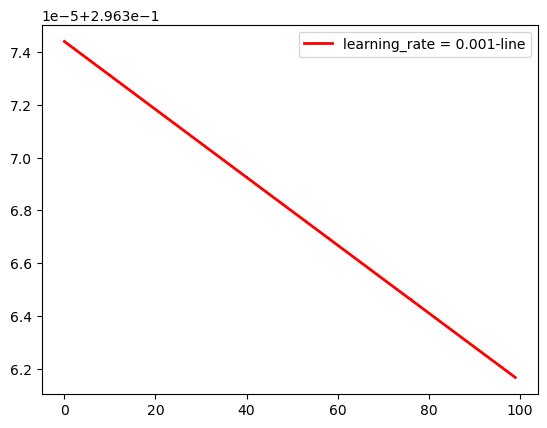

In [25]:
lsquxiantu = []
for i in range(iteration):
    lsquxiantu.append(i)
ter2 = np.array(ls2)
# 画曲线图
plt.plot(ter2, loss1_test, ls="-",color=colors1,marker =",", lw=2, label="learning_rate = 0.5-line")
plt.legend()
plt.show()
plt.plot(ter2, loss2_test, ls="-",color=colors2,marker =",", lw=2, label="learning_rate = 0.3-line")
plt.legend()
plt.show()
plt.plot(ter2, loss3_test, ls="-",color=colors3,marker =",", lw=2, label="learning_rate = 0.1-line")
plt.legend()
plt.show()
plt.plot(ter2, loss4_test, ls="-",color=colors4,marker =",", lw=2, label="learning_rate = 0.01-line")
plt.legend()
plt.show()
plt.plot(ter2, loss5_test, ls="-",color=colors5,marker =",", lw=2, label="learning_rate = 0.001-line")
plt.legend()
plt.show()

In [26]:
# 测试循环
a = 10
while a > 0:
    print(a)
    a -= 1
    
# 测试参数
theta_test = theta1
print(theta_test.flatten())

10
9
8
7
6
5
4
3
2
1
[ 5.87727811 -0.72648648 -1.34034374 -0.24082721 -0.26138857 -0.94648621
 -0.54943374  0.32925729  0.84869422  0.08818554  0.32170224  1.86830181]


编写随机梯度下降算法，计算得到训练和测试的历史数据，作为我们的训练结果

In [31]:
def suijitidu(x_train, y_train, x_test, y_test, learning_rate, theta):
    m = y_train.size
    train_history = np.zeros(500)
    test_history = np.zeros(500)
    t = theta.size
    iter_count = 0
    random_num = random.sample(range(0, m), 500)
    while max(theta) > 0.2 and iter_count < 500:
        # 随机取一个数据
        # random_num = random.sample(range(0, m), 1)
        # print(random_num[iter_count])
        mid = 0
        for j in range(t):
            mid += theta[j] * x_train[random_num[iter_count]][j]
        
        for j in range(t):
            theta[j] = theta[j] - learning_rate * ((mid - y_train[random_num[iter_count]]) * x_train[random_num[iter_count]][j])
        train_history[iter_count] = compute_cost(x_train, y_train, theta)
        test_history[iter_count] = compute_cost(x_test, y_test, theta)
        iter_count += 1
    return theta, train_history, test_history

In [32]:

theta1, loss1_train, loss1_test = random_down(x_train, y_train, x_test, y_test, 0.5, W_init)

In [33]:
print(x_train[1123][4])
# 随机输出一个结果点

-0.0750217003559737


接下来我们测试并且输出损失率，并且计算得出我们要求的损失率，在视图当中展现。对于损失率，结果将会计算很长时间，我们采用的测试集和训练集的划分方法当中也考虑到了这一点，因此并没有选择训练时间特别长的划分方式

In [34]:
print('start test which learning rate is 0.5')
theta1, loss1_train, loss1_test = suijitidu(x_train, y_train, x_test, y_test, 0.5, W_init)
print(theta1)
print(loss1_train)
print(loss1_test)
print('-------------------------------------------------------------------------------------')
print('start test which learning rate is 0.3')
theta2, loss2_train, loss2_test = suijitidu(x_train, y_train, x_test, y_test, 0.3, W_init)
print(theta2)
print(loss2_train)
print(loss2_test)
print('-------------------------------------------------------------------------------------')
print('start test which learning rate is 0.1')
theta3, loss3_train, loss3_test = suijitidu(x_train, y_train, x_test, y_test, 0.1, W_init)
print(theta3)
print(loss3_train)
print(loss3_test)
print('-------------------------------------------------------------------------------------')
print('start test which learning rate is 0.01')
theta4, loss4_train, loss4_test = suijitidu(x_train, y_train, x_test, y_test, 0.01, W_init)
print(theta4)
print(loss4_train)
print(loss4_test)
print('-------------------------------------------------------------------------------------')
print('start test which learning rate is 0.001')
theta5, loss5_train, loss5_test = suijitidu(x_train, y_train, x_test, y_test, 0.001, W_init)
print(theta5)
print(loss5_train)
print(loss5_test)

start test which learning rate is 0.5
[[ 5.36271249e+00]
 [-1.53171704e+00]
 [-2.26178069e+00]
 [ 2.96433404e-01]
 [ 1.15613356e+00]
 [-1.59977216e-03]
 [ 3.92002136e-01]
 [ 2.25791779e-01]
 [ 8.42931703e-01]
 [ 3.70287359e-01]
 [ 2.16817554e-01]
 [ 2.11309565e+00]]
[0.29664399 0.30206353 0.31041016 0.31894353 0.29354506 0.5340422
 0.3243632  0.92197242 0.69472115 0.44747276 0.36719037 0.29962479
 0.41991995 0.34433074 0.29576827 0.33284516 0.3287564  0.300207
 0.32876896 0.57395837 0.32553532 0.32806033 0.29259366 0.29732864
 0.29787858 0.29844902 0.51328261 0.38843163 0.85000178 0.36361648
 0.94528625 0.59266297 0.29919386 0.29138002 0.31374094 0.29193342
 0.29130547 0.60816652 0.46670106 0.33476228 0.69342793 0.31334168
 0.36732515 0.30719504 0.3561243  0.36820504 0.30412875 0.4769748
 0.52695535 0.73137186 0.61883714 0.38374148 0.62162041 0.3990994
 0.35784511 0.30817498 0.50366695 0.34022341 0.43284317 0.47777
 0.33054437 0.3200589  0.58315177 0.32026211 0.31393468 0.33914506
 0.4

将学习率和测试的要求，通过图像可视化的界面进行输出，从而得到一个关于学习率的直观的判断。

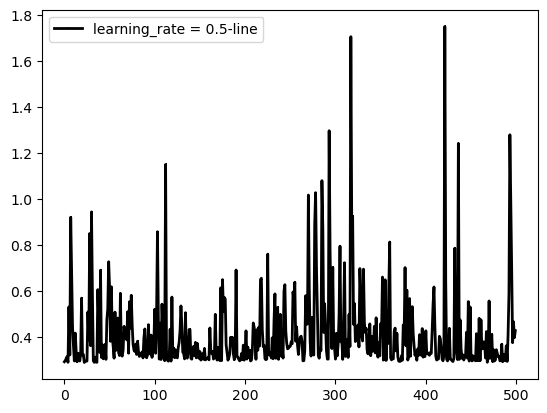

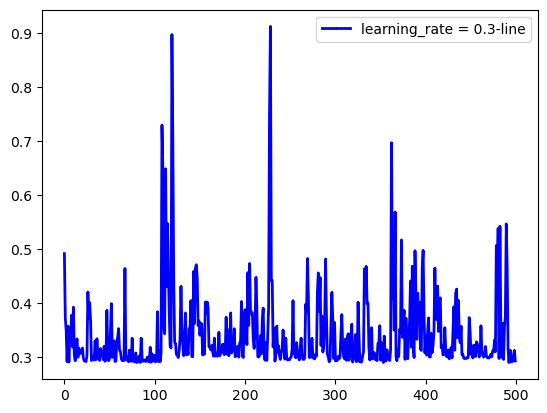

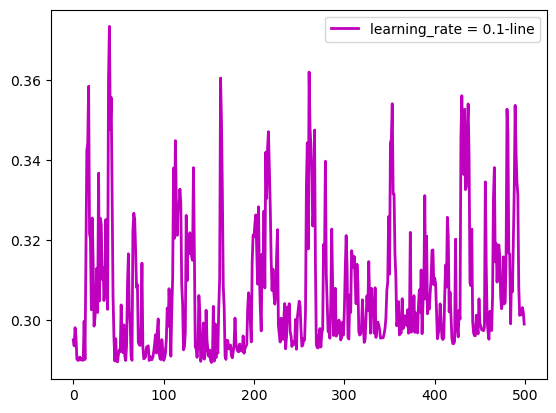

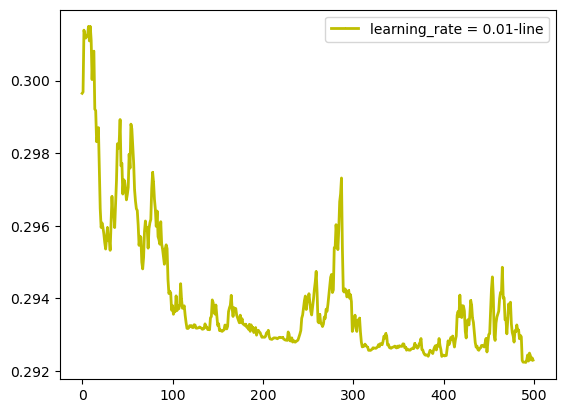

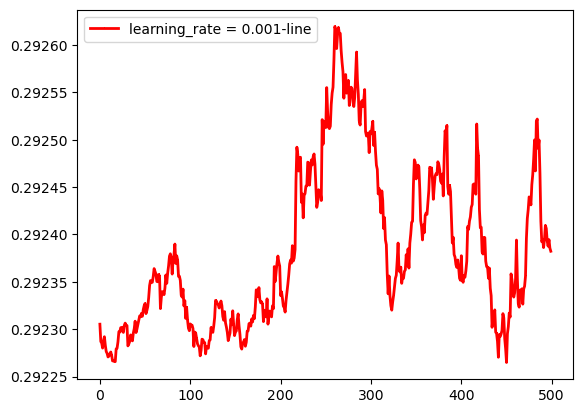

In [35]:
ls1 = []
for i in range(500):
    ls1.append(i)
ter1 = np.array(ls1)

plt.plot(ter1, loss1_test, ls="-",color=colors1,marker =",", lw=2, label="学习率 = 0.5-line")
plt.legend()
plt.show()
plt.plot(ter1, loss2_test, ls="-",color=colors2,marker =",", lw=2, label="学习率 = 0.3-line")
plt.legend()
plt.show()
plt.plot(ter1, loss3_test, ls="-",color=colors3,marker =",", lw=2, label="学习率 = 0.1-line")
plt.legend()
plt.show()
plt.plot(ter1, loss4_test, ls="-",color=colors4,marker =",", lw=2, label="学习率 = 0.01-line")
plt.legend()
plt.show()
plt.plot(ter1, loss5_test, ls="-",color=colors5,marker =",", lw=2, label="学习率 = 0.001-line")
plt.legend()
plt.show()

### 中级要求
探究回归模型在机器学习和统计学上的差异。
   - 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。

#### 回归模型在机器学习和统计学上的差异

##### 从定义上来讲
> 机器学习是一种不依赖于规则设计的数据学习算法

> 统计模型是以数学方程形式表现变量之间关系的程式化表达

##### 分属不同的学派
> 机器学习：计算机科学和人工智能的一个分支,通过数据学习构建分析系统，不依赖明确的构建规则

> 统计模型：数学的分支用以发现变量之间相关关系从而预测输出

##### 当谈到回归模型在机器学习和统计学上的差异时，首先要注意的是它们对回归的理解和目标的不同。

在机器学习（ML）中，回归模型通常被用来建立一个从输入特征到输出值之间的映射关系。其主要目的是通过学习训练数据的模式和趋势来进行预测。在机器学习中，回归模型被视为一种监督学习方法，其中我们尝试从标记的训练数据中学习一个函数，以对新的输入数据进行预测。机器学习中的回归模型可以使用各种算法，如线性回归、决策树回归、支持向量回归等。

相比之下，在统计学中，回归分析被用来研究变量之间的关系，并了解它们之间的因果关系。统计学中的回归分析侧重于对数据进行建模，以揭示自变量和因变量之间的潜在关系，并进行统计推断。回归分析所关注的问题可能包括确定变量之间的相关性、预测、推论和模型解释等。

此外，机器学习和统计学在数据处理和模型评估方面也有一些不同之处。在机器学习中，准确性和性能评估是主要关注的指标，常用的评估方法包括交叉验证和测试集上的性能指标。而在统计学中，更关注的是参数估计、假设检验和置信区间等统计推断方法。

总的来说，回归模型在机器学习和统计学中都是重要的工具，但其应用的重点和目标有所不同。机器学习中的回归模型注重预测和模式学习，而统计学中的回归分析注重推断和解释关系。

##### 本次实验的线性回归模型方面

1. 自变量和因变量线性相关
2. 同方差
3. 波动均值为0
4. 观测样本相互独立
5. 波动服从正态分布

> Logistics回归同样拥有很多的假设。即使是非线性回归也要遵守一个连续的分割边界的假设。然而机器学习却从这些假设中脱身出来。机器学习最大的好处在于没有连续性分割边界的限制。同样我们也并不需要假设自变量或因变量的分布。

##### 数据区别
> 机器学习应用广泛。 在线学习工具可飞速处理数据。这些机器学习工具可学习数以亿计的观测样本，预测和学习同步进行。一些算法如随机森林和梯度助推在处理大数据时速度很快。机器学习处理数据的广度和深度很大

> 统计模型一般应用在较小的数据量和较窄的数据属性上。

##### 公式方面

虽然统计模型和机器学习的最终目标是相似的，但其公式化的结构却非常不同

在统计模型中，估计函数是通过

> 因变量（Y）=f(自变量)+ 扰动函数

机器学习放弃采用函数f的形式，简化为：

> 输出（Y）——> 输入（X）

### 岭回归算法的编写
岭回归算法是一种常用的线性回归方法，旨在解决多重共线性（multicollinearity）问题。在多重共线性存在时，传统的最小二乘法线性回归可能会导致模型不稳定或参数估计的误差较大。岭回归通过引入一个正则化项来缩减模型的参数估计值，从而提高模型的稳定性。

岭回归的核心思想是在最小二乘法优化目标中添加一个惩罚项，该惩罚项以模型的参数大小为基础。岭回归的优化目标可以表示为：

minimize ||y - Xw||^2 + alpha * ||w||^2

其中，y是因变量向量，X是自变量（特征）矩阵，w是待估计的参数向量，alpha是控制正则化强度的超参数。正则化项alpha * ||w||^2对模型的参数进行阻尼，使得参数估计更加稳定。

岭回归使用了L2范数作为惩罚项，因此也被称为L2正则化。通过调整alpha的取值，可以控制正则化的强度。较大的alpha值对参数的影响越大，可以起到更强的缩减参数估计值的效果。


In [36]:
print(np.mat(x_train).shape)  # 16个数据，6个特征
print(np.mat(y_train).shape)  # 16个数据

(3918, 12)
(1, 3918)


In [37]:
# 岭回归标准方程法求解回归参数
def weights(xArr, yArr, lam = 0.2):  # 设置岭系数为0.2
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)

    xTx = xMat.T * xMat  # 矩阵乘法
    rxTx = xTx + np.eye(xMat.shape[1]) * lam  # 岭回归求解的括号的部分
    # 计算矩阵的值,如果值为0，说明该矩阵没有逆矩阵
    if np.linalg.det(rxTx) == 0.0:
        print("This matrix cannot do inverse")
        return
    # xTx.I为xTx的逆矩阵
    ws = rxTx.I * xMat.T * yMat.T
    return ws


ws = weights(x_train, y_train)
print(ws)
print('-----------------------------------------------------------------------------------')
l = 0.001
# 测试不同系数所对应的训练损失和测试损失值
for i in range(0, 10):
    ws = weights(x_train, y_train, l)
    train_loss = compute_cost(x_train, y_train, ws)
    test_loss = compute_cost(x_test, y_test, ws)
    l *= 10
    print(train_loss)
    print(test_loss)
    
    print('-----------------------------------------------------------------------------------')

# # 计算预测值
# print(np.mat(data0)*np.mat(ws))

[[ 5.87651261]
 [ 0.13892945]
 [-1.9326619 ]
 [ 0.0103048 ]
 [ 3.93627401]
 [-0.16148061]
 [ 1.05980356]
 [-0.06315834]
 [-4.58856789]
 [ 0.50100222]
 [ 0.46973739]
 [ 1.67914811]]
-----------------------------------------------------------------------------------
[[0.28196033]]
[[0.28100224]]
-----------------------------------------------------------------------------------
[[0.28196256]]
[[0.28105634]]
-----------------------------------------------------------------------------------
[[0.28210954]]
[[0.28157773]]
-----------------------------------------------------------------------------------
[[0.28383004]]
[[0.28387014]]
-----------------------------------------------------------------------------------
[[0.28838999]]
[[0.28666535]]
-----------------------------------------------------------------------------------
[[0.32815246]]
[[0.32371329]]
-----------------------------------------------------------------------------------
[[1.08494255]]
[[1.08305258]]
---------------------

### 模型的优缺点
岭回归算法的优点包括：

解决多重共线性问题：通过正则化项，岭回归可以有效应对多重共线性，提高模型的稳定性和可靠性。

减小过拟合风险：正则化项可以使模型尽量简单，避免对训练数据的过度拟合，提高对新数据的泛化能力。

易于实现和计算：岭回归可以通过解析方法或迭代优化算法（如梯度下降）求解，计算相对较快。

需要注意的是，岭回归对特征的缩放敏感，因此在使用岭回归之前，通常需要对特征进行标准化或归一化处理。
随机梯度下降（Stochastic Gradient Descent，简称SGD）是一种常用的优化算法，特别适用于大规模数据集和大规模模型训练。下面是关于SGD的优缺点的简要概述：

优点：

计算效率高：相比于批量梯度下降（Batch Gradient Descent），SGD仅使用一小部分样本（随机选取的一个样本或一个小批量样本）计算梯度，因此每次更新参数的计算成本较低。这在处理大规模数据集时尤为重要。

内存占用小：由于SGD只需处理一小部分样本，所需的内存空间较少，可以处理无法一次加载到内存的大型数据集。

收敛速度快：由于每次迭代只使用部分样本，SGD的迭代过程通常更快。对于大规模数据集，在有限的时间内可以执行更多的迭代，从而加速模型的收敛。

缺点：

不稳定：由于随机性，SGD的更新方向不是基于所有样本的梯度平均值，而是基于一个样本或一个小批量样本的梯度估计。因此，SGD的参数更新存在一定的不稳定性，可能在迭代过程中产生较大的波动。

需要调优：SGD的性能依赖于学习率的选择，学习率过小会导致收敛速度慢，学习率过大可能导致跳过最优解。因此，选择合适的学习率需要一定的调优过程。

得到的参数解可能不是最优解：由于SGD的随机性质，它可能在全局最优解附近震荡，导致无法达到最优解。然而，对于大规模数据集和大规模模型，通常对轻微的次优解也足够满意。

本次实验当中由于我们的梯度下降的速度很慢，并且学习所耗费的时间很长，因此我们没有选择跑更多的梯度下降策略，而是对现有的结果进行了一定的分析

# 总结
本次实验进行了随机梯度下降法和岭回归算法的编写，通过编写这些算法，让我对简单的机器学习算法有了更多的了解，对机器学习在更多场景的应用有了一定的认识，我能够对基本的机器学习算法有一定的编程能力，并且对基础机器学习算法有了自己的理解。
本次实验当中对于测试集和训练集的划分需要进行很多的讨论，我在经历过许多次的计算之后，可以很好的得出一个相对比较合适的划分方法。
对于本次学习任务，我认为在我之前的编程经历之上完成是很好的，之前曾经通过调库等算法得出的解与自己探讨问题的最终解有着不同的体会。
在未来的学习当中，我还将与机器学习课当中实现的算法与通过调库实现的方法想结合，努力将机器学习的理论有更加透彻的理解。